In [ ]:
!git clone https://github.com/vkhoi/KTH-Action-Recognition.git

Cloning into 'KTH-Action-Recognition'...
remote: Enumerating objects: 233, done.
remote: Total 233 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (233/233), 709.16 KiB | 11.26 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [ ]:
%cd /content/KTH-Action-Recognition/dataset

/content/KTH-Action-Recognition/dataset


In [ ]:
!wget http://www.nada.kth.se/cvap/actions/boxing.zip
!wget http://www.nada.kth.se/cvap/actions/handclapping.zip
!wget http://www.nada.kth.se/cvap/actions/handwaving.zip
!wget http://www.nada.kth.se/cvap/actions/jogging.zip
!wget http://www.nada.kth.se/cvap/actions/running.zip
!wget http://www.nada.kth.se/cvap/actions/walking.zip

--2021-05-11 16:34:38--  http://www.nada.kth.se/cvap/actions/boxing.zip
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.28.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csc.kth.se/cvap/actions/boxing.zip [following]
--2021-05-11 16:34:38--  https://www.csc.kth.se/cvap/actions/boxing.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.28.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194498294 (185M) [application/zip]
Saving to: ‘boxing.zip’

boxing.zip          100%[===================>] 185.49M  1.10MB/s    in 2m 52s  

2021-05-11 16:37:31 (1.08 MB/s) - ‘boxing.zip’ saved [194498294/194498294]

--2021-05-11 16:37:31--  http://www.nada.kth.se/cvap/actions/handclapping.zip
Resolving www.nada.kth.se (www.nada.kth.

In [ ]:
!unzip boxing.zip -d boxing
!unzip handclapping.zip -d handclapping
!unzip handwaving.zip -d handwaving
!unzip jogging.zip -d jogging
!unzip running.zip -d running
!unzip walking.zip -d walking

!rm *.zip

Archive:  boxing.zip
  inflating: boxing/person01_boxing_d1_uncomp.avi  
  inflating: boxing/person01_boxing_d2_uncomp.avi  
  inflating: boxing/person01_boxing_d3_uncomp.avi  
  inflating: boxing/person01_boxing_d4_uncomp.avi  
  inflating: boxing/person02_boxing_d1_uncomp.avi  
  inflating: boxing/person02_boxing_d2_uncomp.avi  
  inflating: boxing/person02_boxing_d3_uncomp.avi  
  inflating: boxing/person02_boxing_d4_uncomp.avi  
  inflating: boxing/person03_boxing_d1_uncomp.avi  
  inflating: boxing/person03_boxing_d2_uncomp.avi  
  inflating: boxing/person03_boxing_d3_uncomp.avi  
  inflating: boxing/person03_boxing_d4_uncomp.avi  
  inflating: boxing/person04_boxing_d1_uncomp.avi  
  inflating: boxing/person04_boxing_d2_uncomp.avi  
  inflating: boxing/person04_boxing_d3_uncomp.avi  
  inflating: boxing/person04_boxing_d4_uncomp.avi  
  inflating: boxing/person05_boxing_d1_uncomp.avi  
  inflating: boxing/person05_boxing_d2_uncomp.avi  
  inflating: boxing/person05_boxing_d3_unco

In [ ]:
##CODE FOR EXTRACTING OPTICALFLOW VALUES as features and storing as feature files all categories in one pickle file
import cv2
import numpy as np
import os
import pickle

CATEGORIES = ["boxing", "handclapping"]#, "handwaving", "jogging", "running", 
    #"walking"]

if __name__ == "__main__":

    # Create directory to store extracted SIFT features.
    os.makedirs("data", exist_ok=True)

    # Setup parameters for optical flow.
    farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file = []

            prev_frame = None

            while vid.isOpened():
                ret, frame = vid.read()
                if not ret:
                    break

                # Only care about gray scale.
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                if prev_frame is not None:
                    # Calculate optical flow.
                    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,
                        **farneback_params)

                    feature = []
                    for r in range(120):
                        if r % 10 != 0:
                            continue
                        for c in range(160):
                            if c % 10 != 0:
                                continue
                            feature.append(flows[r,c,0])
                            feature.append(flows[r,c,1])
                    feature = np.array(feature)

                    features_current_file.append(feature)

                prev_frame = frame

            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
              print("Done %d files" % n_processed_files)

        # Dump data to file.
#pickle.dump(features, open("data/optflow_%s.p" % category, "wb"))
pickle.dump(features, open("data/optflow.p" , "wb"))




Processing category boxing
Done 30 files
Done 60 files
Done 90 files
Processing category handclapping
Done 120 files
Done 150 files
Done 180 files


In [ ]:
##CODE FOR EXTRACTING OPTICALFLOW VALUES as features and clustering and storing as feature files all categories in one pickle file
import cv2
import numpy as np
import os
import pickle
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


CATEGORIES = ["boxing", "handclapping"]#, "handwaving", "jogging", "running", 
    #"walking"]

if __name__ == "__main__":

    # Create directory to store extracted SIFT features.
    os.makedirs("data", exist_ok=True)

    # Setup parameters for optical flow.
    farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file = []

            prev_frame = None

            while vid.isOpened():
                ret, frame = vid.read()
                if not ret:
                    break

                # Only care about gray scale.
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                if prev_frame is not None:
                    # Calculate optical flow.
                    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,
                        **farneback_params)

                    feature = []
                    for r in range(120):
                        if r % 10 != 0:
                            continue
                        for c in range(160):
                            if c % 10 != 0:
                                continue
                            feature.append(flows[r,c,0])
                            feature.append(flows[r,c,1])
                    feature = np.array(feature)

                    features_current_file.append(feature)

                prev_frame = frame
            
            kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
            pred_y = kmeans.fit_predict(features_current_file)

            #print(pred_y)
            feature_new = np.array(kmeans.cluster_centers_)
            print(feature_new)           
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": feature_new 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
              print("Done %d files" % n_processed_files)

        # Dump data to file.
#pickle.dump(features, open("data/optflow_%s.p" % category, "wb"))
pickle.dump(features, open("data/optflow_cluster_10.p" , "wb"))




Processing category boxing
[[ 1.26640824e-04  8.50523570e-05 -2.38342892e-03 ...  3.01924500e-03
   4.94212626e-03  3.81094520e-03]
 [ 1.69456864e-04  6.73488974e-05  1.83975541e-03 ...  3.05181456e-03
   8.45474235e-03  2.23739522e-03]
 [ 1.04137111e-04  7.14257600e-05 -3.26385867e-03 ... -1.99987659e-03
  -1.28383904e-02 -4.25512911e-03]
 ...
 [ 1.53705235e-04  6.95370122e-05 -5.77352576e-04 ... -6.87059209e-04
  -5.03187545e-03 -2.24342296e-04]
 [ 1.44635439e-04  9.19919703e-05 -3.55781754e-03 ...  5.05682403e-03
  -4.42004308e-02  2.04091012e-03]
 [ 1.66005748e-04  6.74448283e-05 -2.70212589e-03 ... -1.41403661e-03
  -2.41042306e-02  5.57542723e-03]]
[[-5.24319979e-05  2.92722541e-04 -3.77226260e-03 ... -5.30281002e-03
   4.95465743e-05 -1.38319847e-02]
 [-2.79376587e-04  5.82618454e-04  2.01974905e-03 ...  3.37497754e-03
   5.78113526e-02  3.87528176e-02]
 [ 2.50149411e-05  4.33636299e-04 -3.87375890e-03 ...  2.08439518e-02
   1.72191589e-03  1.64659365e-02]
 ...
 [ 1.22501069e-04

In [ ]:
##CODE FOR EXTRACTING OPTICALFLOW VALUES as features and storing as feature files all categories in one pickle file
import cv2
import numpy as np
import os
import pickle

CATEGORIES = ["boxing", "handclapping"]#, "handwaving", "jogging", "running", 
    #"walking"]

if __name__ == "__main__":

    # Create directory to store extracted SIFT features.
    os.makedirs("data", exist_ok=True)

    # Setup parameters for optical flow.
    farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file = []

            prev_frame = None
            count_frame = 0

            while vid.isOpened():
                ret, frame = vid.read()
                count_frame = count_frame + 1
                if not ret:
                    break

                if(count_frame < 250):
                # Only care about gray scale.
                  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                  if prev_frame is not None:
                    # Calculate optical flow.
                    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,
                        **farneback_params)

                    feature = []
                    for r in range(120):
                        if r % 10 != 0:
                            continue
                        for c in range(160):
                            if c % 10 != 0:
                                continue
                            feature.append(flows[r,c,0])
                            feature.append(flows[r,c,1])
                    feature = np.array(feature)

                    features_current_file.append(feature)

                  prev_frame = frame

            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
              print("Done %d files" % n_processed_files)

        # Dump data to file.
#pickle.dump(features, open("data/optflow_%s.p" % category, "wb"))
pickle.dump(features, open("data/optflow250.p" , "wb"))




Processing category boxing
Done 30 files
Done 60 files
Done 90 files
Processing category handclapping
Done 120 files
Done 150 files
Done 180 files


In [ ]:
print(len(features))
print(features[0])

Streaming output truncated to the last 5000 lines.
       -8.99925753e-02, -1.98256448e-02, -1.49136418e-02,  9.43696871e-02,
        2.46602464e-02,  1.48118839e-01, -4.97440696e-02,  5.52135855e-02,
       -4.83681709e-02,  2.33923141e-02, -8.83796364e-02,  3.50250565e-02,
       -8.86502117e-02,  2.31478531e-02, -1.47019364e-02,  4.47973981e-02,
        3.49616893e-02,  5.92464954e-02,  3.56813110e-02,  4.51624729e-02,
       -1.05801769e-01,  9.89899114e-02, -2.50607908e-01, -1.04750870e-02,
       -6.98700026e-02,  1.78170186e-02, -1.93593472e-01, -9.92738269e-03],
      dtype=float32), array([ 4.33961162e-04,  5.73866018e-05,  2.31401320e-03,  1.23301577e-02,
       -8.59348252e-02, -4.68572304e-02,  1.16921589e-01, -1.55399954e-02,
       -3.66961956e-02,  7.76324654e-03, -8.16591084e-03,  1.04416069e-02,
       -6.62109032e-02,  3.22602652e-02,  4.96458970e-02,  2.09917083e-01,
        4.33337176e-03,  1.29164591e-01,  1.05236925e-01,  8.72371048e-02,
       -9.45274811e-03,  1

In [ ]:
#Accessing the feature database
import pickle

# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/optflow200.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))
    cnt += 1

Showing the pickled data:
The data  0  is :  /content/KTH-Action-Recognition/dataset/boxing/person01_boxing_d3_uncomp.avi
The data  0  is :  200
The data  1  is :  /content/KTH-Action-Recognition/dataset/boxing/person09_boxing_d2_uncomp.avi
The data  1  is :  200
The data  2  is :  /content/KTH-Action-Recognition/dataset/boxing/person05_boxing_d1_uncomp.avi
The data  2  is :  200
The data  3  is :  /content/KTH-Action-Recognition/dataset/boxing/person07_boxing_d4_uncomp.avi
The data  3  is :  200
The data  4  is :  /content/KTH-Action-Recognition/dataset/boxing/person03_boxing_d4_uncomp.avi
The data  4  is :  200
The data  5  is :  /content/KTH-Action-Recognition/dataset/boxing/person19_boxing_d2_uncomp.avi
The data  5  is :  200
The data  6  is :  /content/KTH-Action-Recognition/dataset/boxing/person02_boxing_d3_uncomp.avi
The data  6  is :  200
The data  7  is :  /content/KTH-Action-Recognition/dataset/boxing/person04_boxing_d3_uncomp.avi
The data  7  is :  200
The data  8  is :  /co

In [1]:
#EXTRACTING OPTICAL FLOW FROM QUERY VIDEO
import cv2
import numpy as np


# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
  if(prev_frame is not None):

    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)
    print(flows)
    feature = []
    for r in range(120):
      if r % 10 != 0:
        continue
      for c in range(160):
          if c % 10 != 0:
            continue
          feature.append(flows[r,c,0])
          feature.append(flows[r,c,1])
    feature = np.array(feature)
    features_current_file_new.append(feature)
  prev_frame = frame

print(np.array(features_current_file_new))
print(len(features_current_file_new))
            

[]
0


In [ ]:
#EXTRACTING OPTICAL FLOW FROM QUERY VIDEO and doing clustering to get important features
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
  if(prev_frame is not None):

    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)
    #print(flows)
    feature = []
    for r in range(120):
      if r % 10 != 0:
        continue
      for c in range(160):
          if c % 10 != 0:
            continue
          feature.append(flows[r,c,0])
          feature.append(flows[r,c,1])
    feature = np.array(feature)
    features_current_file_new.append(feature)
  prev_frame = frame

features_current_file_new = np.array(features_current_file_new)
print((features_current_file_new))
print(len(features_current_file_new))

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features_current_file_new)

print(pred_y)
feature_new = np.array(kmeans.cluster_centers_)
print(feature_new)           

[[ 7.8166826e-03  3.4231893e-03  2.6740524e-01 ... -4.8670912e-01
   6.2397450e-01 -4.9285766e-01]
 [-4.0252600e-03 -1.1776921e-03 -1.5639985e-01 ... -4.0303272e-01
   6.3305277e-01 -2.5876136e-02]
 [ 4.5227460e-03  1.3972573e-03  4.1264611e-01 ... -1.6061094e-01
   1.0275143e+00 -4.1646546e-01]
 ...
 [ 3.0660150e-03  1.3695725e-03 -9.4729196e-04 ...  1.2635972e-01
   3.1656723e-02  1.4707133e-01]
 [ 2.2545261e-03 -9.3073258e-04 -2.9423307e-03 ...  1.6303776e-02
   1.4981611e-01  2.8002553e-02]
 [ 2.7173855e-03  1.3366659e-03  9.8391704e-02 ...  1.7796101e-01
   6.6315785e-02  2.7740267e-01]]
359
[1 1 2 2 2 2 0 0 1 1 2 2 2 1 1 1 2 2 2 0 0 0 0 1 2 2 2 1 1 1 2 2 3 3 0 0 0
 1 1 2 2 2 1 1 1 2 2 3 0 0 0 1 2 2 2 1 1 1 1 2 3 3 0 0 0 1 2 2 2 2 1 1 1 3
 3 3 0 0 0 1 2 2 2 2 1 1 1 2 3 3 0 0 0 1 1 2 2 2 1 1 1 2 2 3 0 0 0 1 1 2 2
 2 1 1 1 2 2 3 0 0 0 1 2 2 2 2 1 1 1 2 2 2 0 0 0 1 2 2 2 2 1 1 1 2 2 3 0 0
 0 1 1 2 2 2 1 1 1 2 2 3 0 0 0 0 1 2 2 2 1 1 1 2 2 3 3 0 0 0 0 1 2 2 2 1 1
 1 2 3 3 0 0 0 1 1 2 

In [ ]:
#EXTRACTING OPTICAL FLOW FROM QUERY VIDEO first 200 features
import cv2

# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  if(count_frame < 250):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
    if(prev_frame is not None):

      flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)
    #print(flows)
      feature = []
      for r in range(120):
        if r % 10 != 0:
          continue
        for c in range(160):
          if c % 10 != 0:
            continue
          feature.append(flows[r,c,0])
          feature.append(flows[r,c,1])
      feature = np.array(feature)
      features_current_file_new.append(feature)
    prev_frame = frame

print(np.array(features_current_file_new))
print(len(features_current_file_new))
            

[[ 7.8166826e-03  3.4231893e-03  2.6740524e-01 ... -4.8670912e-01
   6.2397450e-01 -4.9285766e-01]
 [-4.0252600e-03 -1.1776921e-03 -1.5639985e-01 ... -4.0303272e-01
   6.3305277e-01 -2.5876136e-02]
 [ 4.5227460e-03  1.3972573e-03  4.1264611e-01 ... -1.6061094e-01
   1.0275143e+00 -4.1646546e-01]
 ...
 [ 6.5189175e-04 -6.2581286e-04  5.9007991e-02 ... -2.4532214e-01
   3.0376899e-01 -1.9065556e-01]
 [-1.7447599e-03  2.7233912e-03  7.8184800e-03 ...  1.0137602e-02
  -1.4929266e-01  2.2602815e-02]
 [-4.2234347e-03  2.0194065e-03 -4.8188094e-02 ... -5.7809133e-02
  -8.4871598e-02 -7.3355094e-02]]
200


In [ ]:
#CBVR SAMPLE TEST BENCH FOR OPTICAL FLOW BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
#QUERY VIDEO
# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  if(count_frame < 250):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
    if(prev_frame is not None):

      flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)
    #print(flows)
      feature = []
      for r in range(120):
        if r % 10 != 0:
          continue
        for c in range(160):
          if c % 10 != 0:
            continue
          feature.append(flows[r,c,0])
          feature.append(flows[r,c,1])
      feature = np.array(feature)
      features_current_file_new.append(feature)
    prev_frame = frame

features_current_file_new = np.array(features_current_file_new)
print(features_current_file_new)
print(len(features_current_file_new))

            





# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/optflow250.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(features_current_file_new)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



[[ 7.8166826e-03  3.4231893e-03  2.6740524e-01 ... -4.8670912e-01
   6.2397450e-01 -4.9285766e-01]
 [-4.0252600e-03 -1.1776921e-03 -1.5639985e-01 ... -4.0303272e-01
   6.3305277e-01 -2.5876136e-02]
 [ 4.5227460e-03  1.3972573e-03  4.1264611e-01 ... -1.6061094e-01
   1.0275143e+00 -4.1646546e-01]
 ...
 [-9.8070840e-04  3.6893492e-03  4.7969919e-02 ...  5.6081362e-02
   1.0410295e-03  5.2370772e-02]
 [-4.2444843e-04  4.2730579e-04  2.8194852e-02 ... -1.8248521e-02
   2.6143031e-02  6.0814846e-02]
 [ 1.3266825e-03  5.2849040e-03  3.3242125e-02 ...  8.5601382e-02
  -8.9008808e-02  9.9406697e-02]]
248
Showing the pickled data:
The data  0  is :  248
119.7244
The data  1  is :  248
188.04134
The data  2  is :  248
121.58785
The data  3  is :  248
134.74886
The data  4  is :  248
141.01463
The data  5  is :  248
173.14249
The data  6  is :  248
123.01793
The data  7  is :  248
148.9436
The data  8  is :  248
0.0
The data  9  is :  248
212.75902
The data  10  is :  248
146.58762
The data  11  

In [ ]:
#CBVR SAMPLE TEST BENCH FOR OPTICAL FLOW BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
#QUERY VIDEO
# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY/person01_handclapping_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  if(count_frame < 250):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
    if(prev_frame is not None):

      flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)
    #print(flows)
      feature = []
      for r in range(120):
        if r % 10 != 0:
          continue
        for c in range(160):
          if c % 10 != 0:
            continue
          feature.append(flows[r,c,0])
          feature.append(flows[r,c,1])
      feature = np.array(feature)
      features_current_file_new.append(feature)
    prev_frame = frame

features_current_file_new = np.array(features_current_file_new)
print(features_current_file_new)
print(len(features_current_file_new))

            





# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/optflow250.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(features_current_file_new)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



[[ 2.25646691e-05 -1.96453431e-04 -1.72560185e-03 ...  7.44237937e-03
  -5.09879410e-01  1.00941835e-02]
 [-5.20206429e-03 -1.96285444e-04 -2.60860920e-01 ... -2.12991567e-04
  -7.32667744e-02  1.40760886e-02]
 [ 1.25180976e-03  2.64457456e-04 -5.20221656e-03 ... -1.29374983e-02
  -1.73376116e-03 -2.01011635e-03]
 ...
 [ 1.59642415e-03  2.19167832e-05 -2.30498388e-02 ... -5.40089561e-03
   2.55863130e-01 -8.49767402e-03]
 [-1.76597864e-03  1.38207673e-04 -4.48325053e-02 ...  1.90055534e-01
   1.00280523e-01  1.72070608e-01]
 [ 9.94687085e-04  1.27679075e-03 -9.09923017e-02 ...  4.96459268e-02
  -2.51763999e-01  8.25888515e-02]]
248
Showing the pickled data:
The data  0  is :  248
128.5186
The data  1  is :  248
192.7143
The data  2  is :  248
126.31004
The data  3  is :  248
158.7175
The data  4  is :  248
146.43196
The data  5  is :  248
180.97334
The data  6  is :  248
128.52193
The data  7  is :  248
153.92206
The data  8  is :  248
133.82054
The data  9  is :  248
211.93948
The dat

In [ ]:
#CBVR SAMPLE TEST BENCH FOR OPTICAL FLOW + Clustering BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans



# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
#QUERY VIDEO
# Setup parameters for optical flow.


# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
  if(prev_frame is not None):

    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)
    #print(flows)
    feature = []
    for r in range(120):
      if r % 10 != 0:
        continue
      for c in range(160):
          if c % 10 != 0:
            continue
          feature.append(flows[r,c,0])
          feature.append(flows[r,c,1])
    feature = np.array(feature)
    features_current_file_new.append(feature)
  prev_frame = frame

features_current_file_new = np.array(features_current_file_new)
print((features_current_file_new))
print(len(features_current_file_new))

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features_current_file_new)

#print(pred_y)
feature_new = np.array(kmeans.cluster_centers_)
print(feature_new)                       





# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/optflow_cluster_4.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(feature_new)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



[[ 7.8166826e-03  3.4231893e-03  2.6740524e-01 ... -4.8670912e-01
   6.2397450e-01 -4.9285766e-01]
 [-4.0252600e-03 -1.1776921e-03 -1.5639985e-01 ... -4.0303272e-01
   6.3305277e-01 -2.5876136e-02]
 [ 4.5227460e-03  1.3972573e-03  4.1264611e-01 ... -1.6061094e-01
   1.0275143e+00 -4.1646546e-01]
 ...
 [ 3.0660150e-03  1.3695725e-03 -9.4729196e-04 ...  1.2635972e-01
   3.1656723e-02  1.4707133e-01]
 [ 2.2545261e-03 -9.3073258e-04 -2.9423307e-03 ...  1.6303776e-02
   1.4981611e-01  2.8002553e-02]
 [ 2.7173855e-03  1.3366659e-03  9.8391704e-02 ...  1.7796101e-01
   6.6315785e-02  2.7740267e-01]]
359
[[ 1.0593296e-03  1.7593588e-03  2.7486525e-02 ...  1.3979249e-02
   9.3918871e-03  4.8641679e-03]
 [ 7.3942088e-04  1.4773109e-03  4.2090230e-03 ...  1.0209568e-02
   1.6598867e-02  1.5634907e-02]
 [ 1.3458012e-03  1.8247922e-03  2.2544252e-02 ...  2.9435963e-03
   2.8494608e-02  3.6715993e-03]
 [ 1.0584323e-03  1.2769763e-03  9.4512608e-03 ... -1.2665278e-02
   2.8640408e-02  6.7121815e-05]]

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(df1) 
print(Total)
res = []
query = 'boxing'
#for i in range(0,Total):
for index, row in df1.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (100)
  map_fet.append(mTP)
  mar_fet.append(mTR)
  mTP = 0



print(map_fet)
print(mar_fet)



199
['boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'boxi

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(df1) 
print(Total)
res = []
query = 'boxing'
#for i in range(0,Total):
for index, row in df1.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (100)
  map_fet.append(mTP)
  mar_fet.append(mTR)
  mTP = 0



print(map_fet)
print(mar_fet)



199
['boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing',

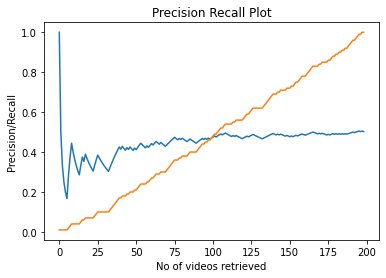

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("No of videos retrieved")
plt.ylabel("Precision/Recall")
plt.title('Precision Recall Plot')
plt.show()

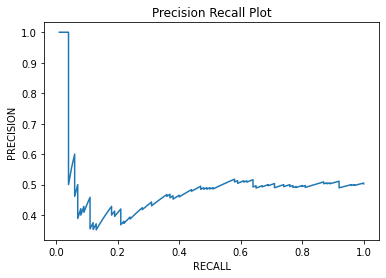

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
#plt.plot(x,y1)
plt.plot(y2,y1)
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title('Precision Recall Plot')
plt.show()

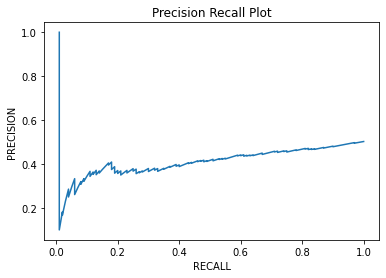

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
#plt.plot(x,y1)
plt.plot(y2,y1)
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title('Precision Recall Plot')
plt.show()

In [ ]:
#CODE FOR EXTRACTING PIXEL VALUES as features and storing as feature files all categories in one pickle file

import cv2
import numpy as np
import os
import pickle

CATEGORIES = ["boxing", "handclapping"]#, "handwaving"]#, "jogging", "running", 
   # "walking"]

if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file_new = []

            
            count_frame = 0
            while vid.isOpened():
                ret, frame = vid.read()
                count_frame = count_frame + 1
                if not ret:
                    break
                if(count_frame < 250):
                # Only care about gray scale.
                  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
                  features_current_file_new.append(frame)
                  features_current_file = np.array(features_current_file_new)

            print(filename)    
            print(path)
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
pickle.dump(features, open("data/pixel250.p" , "wb"))




Processing category boxing
person01_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person01_boxing_d3_uncomp.avi
person09_boxing_d2_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person09_boxing_d2_uncomp.avi
person05_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person05_boxing_d1_uncomp.avi
person07_boxing_d4_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person07_boxing_d4_uncomp.avi
person03_boxing_d4_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person03_boxing_d4_uncomp.avi
person19_boxing_d2_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person19_boxing_d2_uncomp.avi
person02_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person02_boxing_d3_uncomp.avi
person04_boxing_d3_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person04_boxing_d3_uncomp.avi
person01_boxing_d1_uncomp.avi
/content/KTH-Action-Recognition/dataset/boxing/person01_boxing_d1_uncomp.avi
person21_b

In [ ]:
#CBVR SAMPLE TEST BENCH FOR PIXEL BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < 250):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
    features_current_file_new.append(frame)
    features_current_file = np.array(features_current_file_new)

# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/pixel250.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(features_current_file)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



249
Showing the pickled data:
The data  0  is :  249
325580.41881077556
The data  1  is :  249
266138.376163604
The data  2  is :  249
342116.88372104644
The data  3  is :  249
440173.7328419314
The data  4  is :  249
382586.0659368033
The data  5  is :  249
298061.74193612975
The data  6  is :  249
295288.38481051027
The data  7  is :  249
361342.39424678637
The data  8  is :  249
0.0
The data  9  is :  249
364272.85026474315
The data  10  is :  249
388203.42237157054
The data  11  is :  249
479232.72537985136
The data  12  is :  249
277117.36408965784
The data  13  is :  249
379077.9860200273
The data  14  is :  249
380309.8241473654
The data  15  is :  249
436942.4822101875
The data  16  is :  249
405472.36793769314
The data  17  is :  249
425997.3386501376
The data  18  is :  249
290645.66083979304
The data  19  is :  249
357043.4249345589
The data  20  is :  249
363669.14314387465
The data  21  is :  249
377400.8942278754
The data  22  is :  249
325313.65429689543
The data  23  is

In [ ]:
#CBVR SAMPLE TEST BENCH FOR PIXEL BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/QUERY/person01_handclapping_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < 250):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
    features_current_file_new.append(frame)
    features_current_file = np.array(features_current_file_new)

# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/pixel250.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(features_current_file)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



249
Showing the pickled data:
The data  0  is :  249
372763.7343908337
The data  1  is :  249
300008.83523823094
The data  2  is :  249
365793.30458744045
The data  3  is :  249
441076.87761658966
The data  4  is :  249
382604.90104937233
The data  5  is :  249
323165.02583664586
The data  6  is :  249
327587.73951416434
The data  7  is :  249
385383.5952424545
The data  8  is :  249
407080.78265867574
The data  9  is :  249
378668.01992246456
The data  10  is :  249
393454.3394334341
The data  11  is :  249
470338.5186150503
The data  12  is :  249
300518.4274749221
The data  13  is :  249
389707.0465760146
The data  14  is :  249
380860.30170523154
The data  15  is :  249
459338.3866737027
The data  16  is :  249
406860.2097612889
The data  17  is :  249
436023.78943470505
The data  18  is :  249
315456.59820805775
The data  19  is :  249
368752.41424972395
The data  20  is :  249
361426.60313955863
The data  21  is :  249
386569.87521792226
The data  22  is :  249
348476.12437870115

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(df1) 
print(Total)
res = []
query = 'boxing'
#for i in range(0,Total):
for index, row in df1.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet1 = []
mar_fet1 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (100)
  map_fet1.append(mTP)
  mar_fet1.append(mTR)
  mTP = 0



print(map_fet1)
print(mar_fet1)



199
['boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', '

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(df1) 
print(Total)
res = []
query = 'handclapping'
#for i in range(0,Total):
for index, row in df1.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet1 = []
mar_fet1 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (100)
  map_fet1.append(mTP)
  mar_fet1.append(mTR)
  mTP = 0



print(map_fet1)
print(mar_fet1)



199
['handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', '

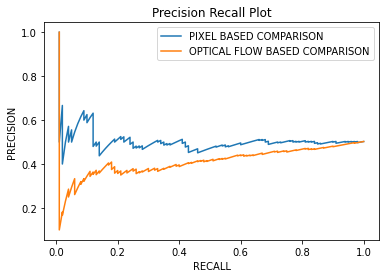

In [ ]:
#FOR BOXING CATEGORY QUERY
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#PIXEL BASED
x1 = map_fet1
x2 = mar_fet1
#OPTICAL FLOW
y1 = map_fet
y2 = mar_fet
plt.plot(x2,x1, label = 'PIXEL BASED COMPARISON')
plt.plot(y2,y1, label = 'OPTICAL FLOW BASED COMPARISON')
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title('Precision Recall Plot')
plt.legend()
plt.show()

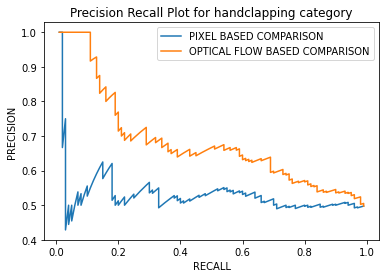

In [ ]:
#FOR HANDCLAPPING CATEGORY QUERY
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#PIXEL BASED
x1 = map_fet1
x2 = mar_fet1
#OPTICAL FLOW
y1 = map_fet
y2 = mar_fet
plt.plot(x2,x1, label = 'PIXEL BASED COMPARISON')
plt.plot(y2,y1, label = 'OPTICAL FLOW BASED COMPARISON')
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title('Precision Recall Plot for handclapping category')
plt.legend()
plt.show()